In [1]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\Sharvaree\Downloads\CP2\Comments.csv")
data.head()

,Comment
0,2023 year is India's year\n1. Sco summit\n2. C...
1,Proud to be a Odia our konarka chakra is the n...
2,That is remarkable that India's relentless eff...
3,Proud to be a Bhartiya
4,2023 year is India's year\n1. Sco summit\n2. C...


# Data Cleaning or Pre-Processing

### Identifying & Treatment Missing Value

In [3]:
data.isnull().sum()

Comment    0
dtype: int64

# Step 1 :- Lower case

In [4]:
data.iloc[335,0]  # [row index , column index ]

'Why is Italian PM laughing so much is anything about antonio😂😂'

In [5]:
data.Comment = data.Comment.str.lower()

In [6]:
data.iloc[335,0]

'why is italian pm laughing so much is anything about antonio😂😂'

# Remove url

In [7]:
data.iloc[111,0]

'one thing you gotaa give to modi is his charisma!\nhe just knows how to get people on his side no matter who!'

* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [8]:
data.Comment = data.Comment.str.replace(r'http\S+|www.\S+','',case=False)  # | = or 
data.iloc[111,0]

'one thing you gotaa give to modi is his charisma!\nhe just knows how to get people on his side no matter who!'

# Step 2 :- Punctuation

In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def remove_punctuation(abc):
    text_nopunt="".join([c  
                         for c in abc  
                         if c not in string.punctuation])
    return text_nopunt 


In [11]:
data.iloc[405,0]

"biden be like: where the hell i am? is it mars or jupiter? oh it's india,hey modi😂😂"

In [12]:
data.Comment = data.Comment.apply(lambda x : remove_punctuation(x))  # x = Text 

In [13]:
data.iloc[405,0]

'biden be like where the hell i am is it mars or jupiter oh its indiahey modi😂😂'

# Remove Number

In [14]:
data.iloc[431,0]

'207 im here for this'

* \d == Returns a match where the string contains digits (numbers from 0-9)
* (+) == one or more occurance

In [15]:
data['Comment'] = data['Comment'].str.replace('\d+','')  # data.text  or data['text']

In [16]:
data.iloc[431,0]

' im here for this'

# Removing Stop Words

In [17]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
data.iloc[565,0]

'they are showing attitude like they are the most powerful people in the world'

In [19]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['Comment'] = data['Comment'].apply(lambda x: ' '.join([abc   # x = Text 
                                                      for abc in x.split() # word tokenizer # abc = Delhi
                                                      if abc not in (stop)]))

In [20]:
data.iloc[565,0]

'showing attitude like powerful people world'

# Common Words

* manually created as per the case study

In [21]:
 data.iloc[577,0]

'people india benefits daily livelihood want jobs want country develop full education good health develop everyone healthy economy poorest people n everyone'

In [22]:
import re # replace of words
nltk.download('words') # downloading dictionary of nltk  
words = set(nltk.corpus.words.words()) # corpus & set array 
words

[nltk_data] Error loading words: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


{'apology',
 'impeccably',
 'multidirectional',
 'nunatak',
 'Tilletia',
 'buttonmold',
 'shamir',
 'unorganizable',
 'sa',
 'shindy',
 'delineatory',
 'therefor',
 'unburnt',
 'embolomerous',
 'majuscule',
 'furtiveness',
 'unleasable',
 'poeticality',
 'preparietal',
 'ischiopubic',
 'analysability',
 'strome',
 'pedophilic',
 'isotope',
 'aery',
 'pulmotracheate',
 'Austrogaean',
 'tetrahedron',
 'titanous',
 'vomeropalatine',
 'birefringence',
 'somnambulator',
 'notator',
 'unbelieffulness',
 'unissued',
 'matti',
 'midverse',
 'auh',
 'seamanite',
 'Kanawari',
 'antipopulationist',
 'postpone',
 'tripartient',
 'curator',
 'intermedial',
 'rain',
 'bellying',
 'idoneous',
 'luteo',
 'atloid',
 'droopingness',
 'histotrophy',
 'Hebraistical',
 'mycetoid',
 'Germanomania',
 'curatolatry',
 'brin',
 'Grindelia',
 'forecourt',
 'pantopod',
 'decorticate',
 'paradoxically',
 'pianofortist',
 'Amex',
 'Svetambara',
 'bausond',
 'regrind',
 'antiketogenesis',
 'Sirianian',
 'Fegatella',

In [23]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('delhipolicetorturingfarmers|delhipolice|police|delhi', '', text) #remove delhipolice
    text =  re.sub('farmer|farmers|farm|farmed','', text) #remove farmers
    text =  re.sub('protests|protest','', text) #remove Protest
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad & aA
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return text

In [24]:
 data.iloc[577,0]

'people india benefits daily livelihood want jobs want country develop full education good health develop everyone healthy economy poorest people n everyone'

In [25]:
data = pd.DataFrame(data.Comment.apply(lambda x: clean_text_round2(x)))
data.iloc[577,0]

'people daily livelihood want want country develop full education good health develop everyone healthy economy people everyone'

# Lemmatization

In [26]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet') # DOWNLAOD WORDNET

lemmatizer = WordNetLemmatizer() # ASSIGNING
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() ## Word Token

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [27]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") 
            for w in word_tokenizer.tokenize(text)]

In [28]:
data.iloc[588,0]

'getting aside growing strong'

In [29]:
data.Comment = data.Comment.apply(lambda x :' '.join(lemmatize_text(x)))
data.iloc[588,0]

'get aside grow strong'

# Strip extra whitespace

In [30]:
data.iloc[588,0]

'get aside grow strong'

In [31]:
data['Comment'] = (data['Comment'].astype("str").str.rstrip())
data.iloc[588,0]

'get aside grow strong'

###  Finished Data Cleaning

In [32]:
data=data.drop_duplicates('Comment')
data

,Comment
0,year year summit presidency cricket world cup ...
1,chakra new identity love love
2,remarkable relentless effort bring union membe...
3,
5,wheel absolutely phenomenal doubt significant ...
...,...
949,many poor government war lord west government ...
951,need new president prime minister look death p...
954,complete
956,next prime minister time finish back


# Term Document Matrix

In [33]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # BACK UP
data_cv = cv.fit_transform(data.Comment)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) # TERM = KEY WORDS

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,568,569,570,571,572,573,574,575,576,577
aal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abroad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()


,0,1,2,3,4,5,6,7,8,9,...,569,570,571,572,573,574,575,576,577,freq
aal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
abroad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
absence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
absolutely,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,569,570,571,572,573,574,575,576,577,freq
0,aal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,abroad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,absence,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,absolutely,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
tdm1 = tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(20)

,Word,freq
1023,world,51
701,president,37
520,like,37
362,great,37
173,country,30
993,walk,25
664,people,24
1004,welcome,22
589,miss,22
510,leader,21


In [37]:
bar = tdm1.head(10)

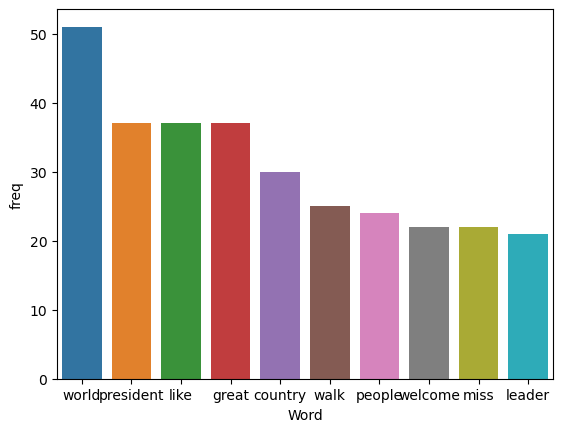

In [38]:
import seaborn as sns
fg = sns.barplot(x='Word', y='freq',data=bar)

In [39]:
text = " ".join(review for review in data.Comment)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 18449 words in the combination of all review.


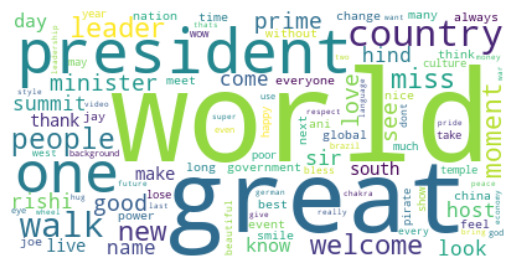

In [40]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
cloud = WordCloud(stopwords=stopwords, # BACK UP
                      background_color="white",
                      collocations=False,
                      max_words=100).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") # NO AXIS
plt.show() # DISPLAY PLOT

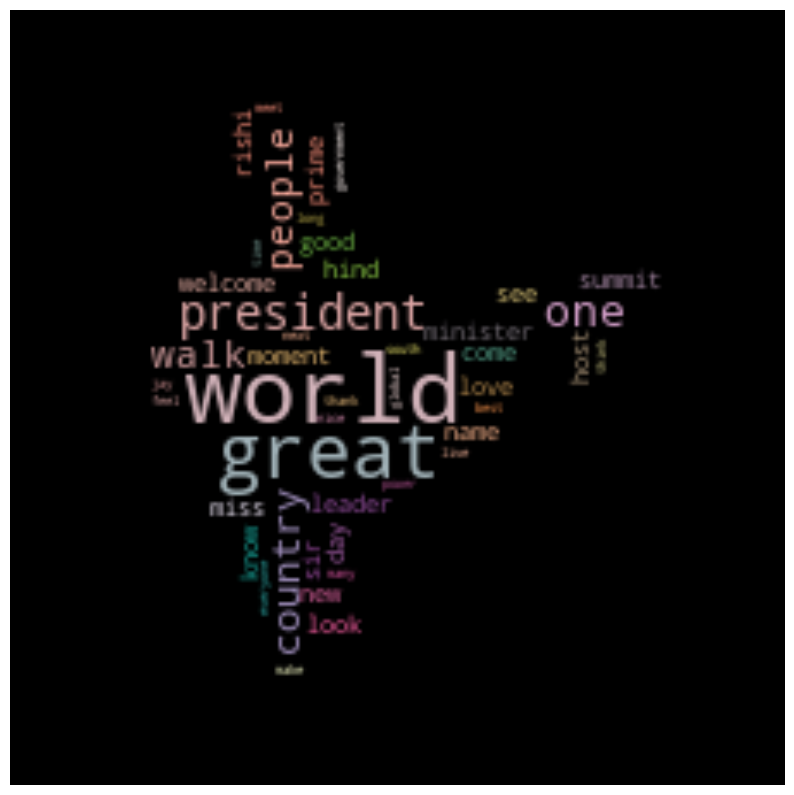

In [41]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open(r"C:\Users\Sharvaree\OneDrive\Pictures\Saved Pictures\images.jpg")) # shape & colour
abc = WordCloud(stopwords=stopwords,
                           background_color='black',
                           mode="RGBA", # combination of colour
                           max_words=500, 
                           mask=mask,  ### shape of leaf
                           collocations=False).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask) # colour OF leaf
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(abc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

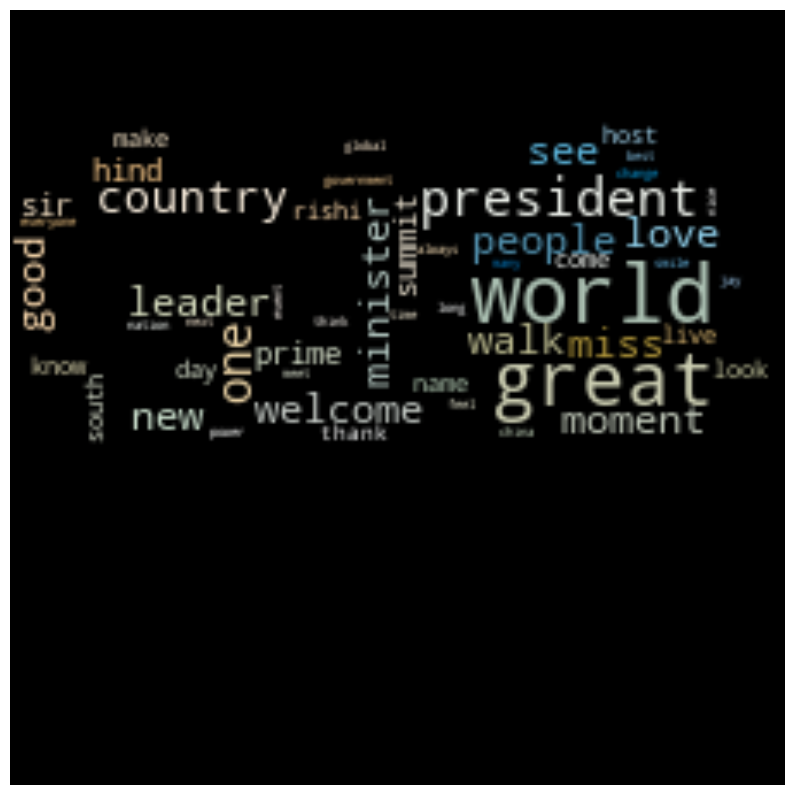

In [42]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open(r"C:\Users\Sharvaree\OneDrive\Pictures\Saved Pictures\g2o...jpg")) # shape & colour
abc = WordCloud(stopwords=stopwords,
                           background_color='black',
                           mode="RGBA", # combination of colour
                           max_words=500, 
                           mask=mask,  ### shape of leaf
                           collocations=False).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask) # colour OF leaf
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(abc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

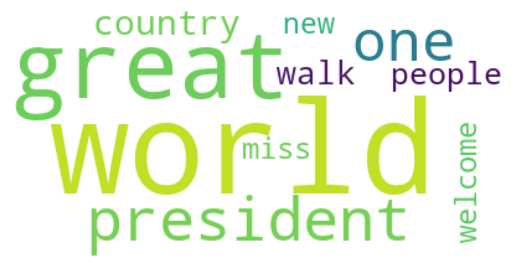

In [43]:
## collocations=False means try to contro the duplicate keyword and counts as 1

# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
abc = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False,
                      mode="RGBA",
                      max_words=10).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis 

In [44]:
data

,Comment
0,year year summit presidency cricket world cup ...
1,chakra new identity love love
2,remarkable relentless effort bring union membe...
3,
5,wheel absolutely phenomenal doubt significant ...
...,...
949,many poor government war lord west government ...
951,need new president prime minister look death p...
954,complete
956,next prime minister time finish back


In [45]:
data = data.drop_duplicates('Comment') 
data

,Comment
0,year year summit presidency cricket world cup ...
1,chakra new identity love love
2,remarkable relentless effort bring union membe...
3,
5,wheel absolutely phenomenal doubt significant ...
...,...
949,many poor government war lord west government ...
951,need new president prime minister look death p...
954,complete
956,next prime minister time finish back


In [46]:
#pip install -U textblob

In [47]:
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity        # polarity range -1 to +1
data['polarity'] = data['Comment'].apply(pol)
data.head(5)

,Comment,polarity
0,year year summit presidency cricket world cup ...,0.000000
1,chakra new identity love love,0.378788
2,remarkable relentless effort bring union membe...,0.390000
3,,0.000000
5,wheel absolutely phenomenal doubt significant ...,0.437500


In [48]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,Comment,polarity,Sentiment
0,year year summit presidency cricket world cup ...,0.000000,Positive
1,chakra new identity love love,0.378788,Positive
2,remarkable relentless effort bring union membe...,0.390000,Positive
3,,0.000000,Positive
5,wheel absolutely phenomenal doubt significant ...,0.437500,Positive


<Axes: >

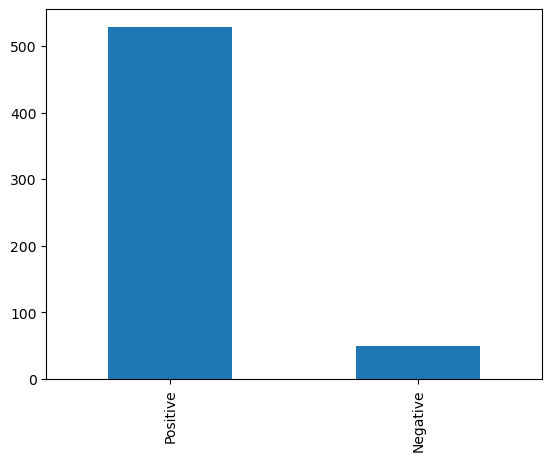

In [49]:
data.Sentiment.value_counts().plot.bar()

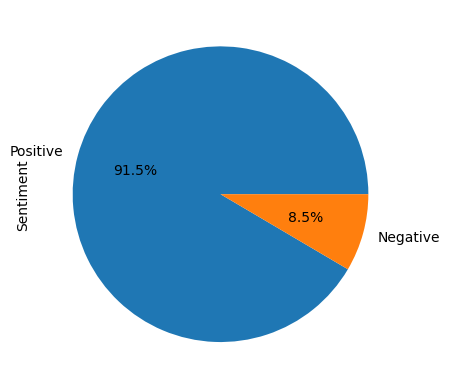

In [50]:
data.Sentiment.value_counts().plot.pie(autopct="%.1f%%");

In [51]:
import os
os.chdir(r"C:\Users\Sharvaree\OneDrive\Desktop")

In [56]:
import pickle

pickle.dump(TextBlob, open('NLP_Model.pkl','wb'))  # Exporting model from python to laptop

In [55]:
Finalmodel = pickle.load(open('NLP_Model.pkl','rb'))  # import Model from laptop to python 